<a href="https://colab.research.google.com/github/sm1899/ML/blob/main/PCA_using_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Code Summary

This Python script performs Gaussian Mixture Model (GMM) clustering on MNIST dataset images. It utilizes the scikit-learn library for GMM, Pandas for data handling, NumPy for numerical operations, and Matplotlib for visualization.

#### Structure Overview
1. **Import Libraries:**
   - Pandas for data manipulation
   - NumPy for numerical operations
   - Scikit-learn's Gaussian Mixture Model (GMM) for clustering
   - Matplotlib for visualization

2. **Load Data:**
   - The `load_data` function reads the MNIST dataset from a CSV file, removes the label column, and normalizes the pixel values to a range between 0 and 1.

3. **Perform GMM Clustering:**
   - The `perform_gmm_clustering` function performs GMM clustering on the MNIST images using a specified number of principal components and clusters.
   - It calculates the singular value decomposition (SVD) of the images, extracts the specified number of principal components, and fits a GMM to these components.
   - The resulting clusters are visualized using both a scatter plot and a grid of images.

4. **Visualize Clusters:**
   - The `visualize_clusters` function creates a grid of images to visually represent the clustered data.

5. **Main Function:**
   - The `main` function defines the file path to the MNIST dataset, loads the data, and iterates through different combinations of the number of principal components and clusters, calling `perform_gmm_clustering` for each combination.

6. **Execution:**
   - The script's main block executes the `main` function when the script is run.

#### Notable Features:
- The script explores different combinations of the number of principal components (`num_components_list`) and the number of clusters (`num_clusters_list`).
- GMM clustering results are visualized using both a scatter plot and a grid of images for each combination.
- The code is structured with modular functions for data loading, clustering, and visualization, enhancing readability and maintainability.

#### Output:
- The script generates visualizations for GMM clustering on MNIST images for various combinations of principal components and clusters.

No of Principle Components: 32
No of Clusters: 4


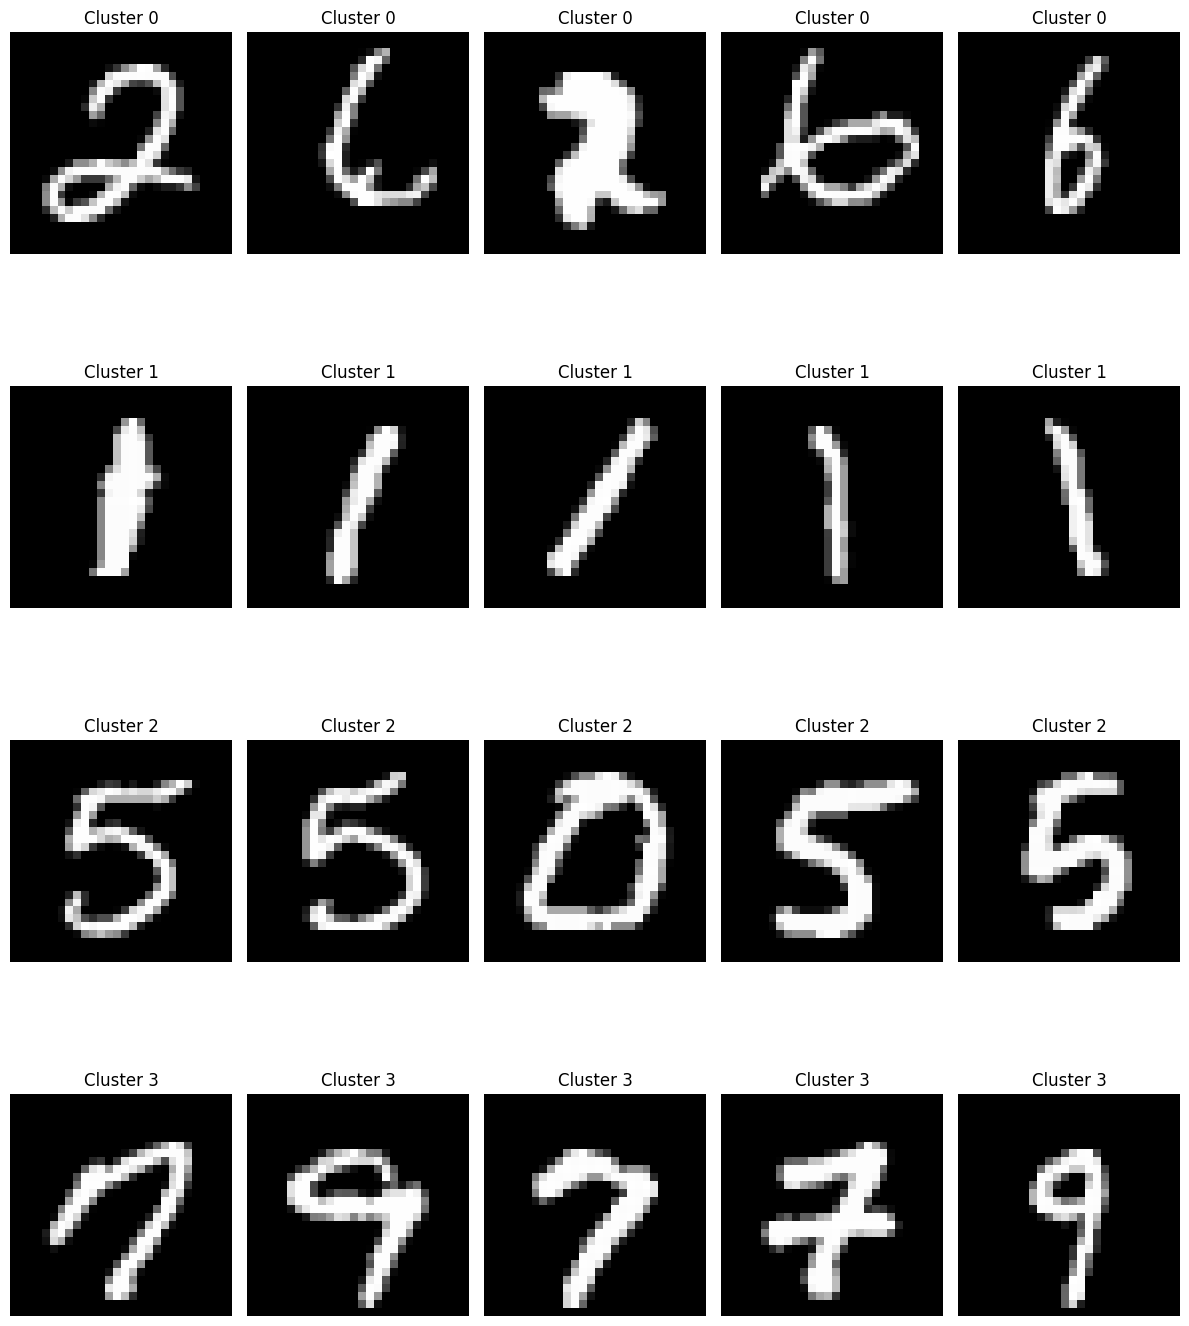

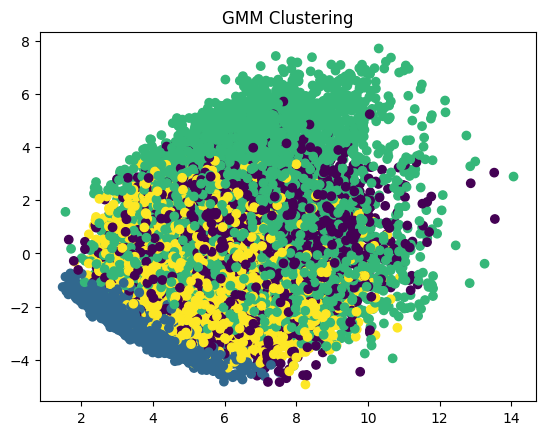

No of Principle Components: 32
No of Clusters: 7


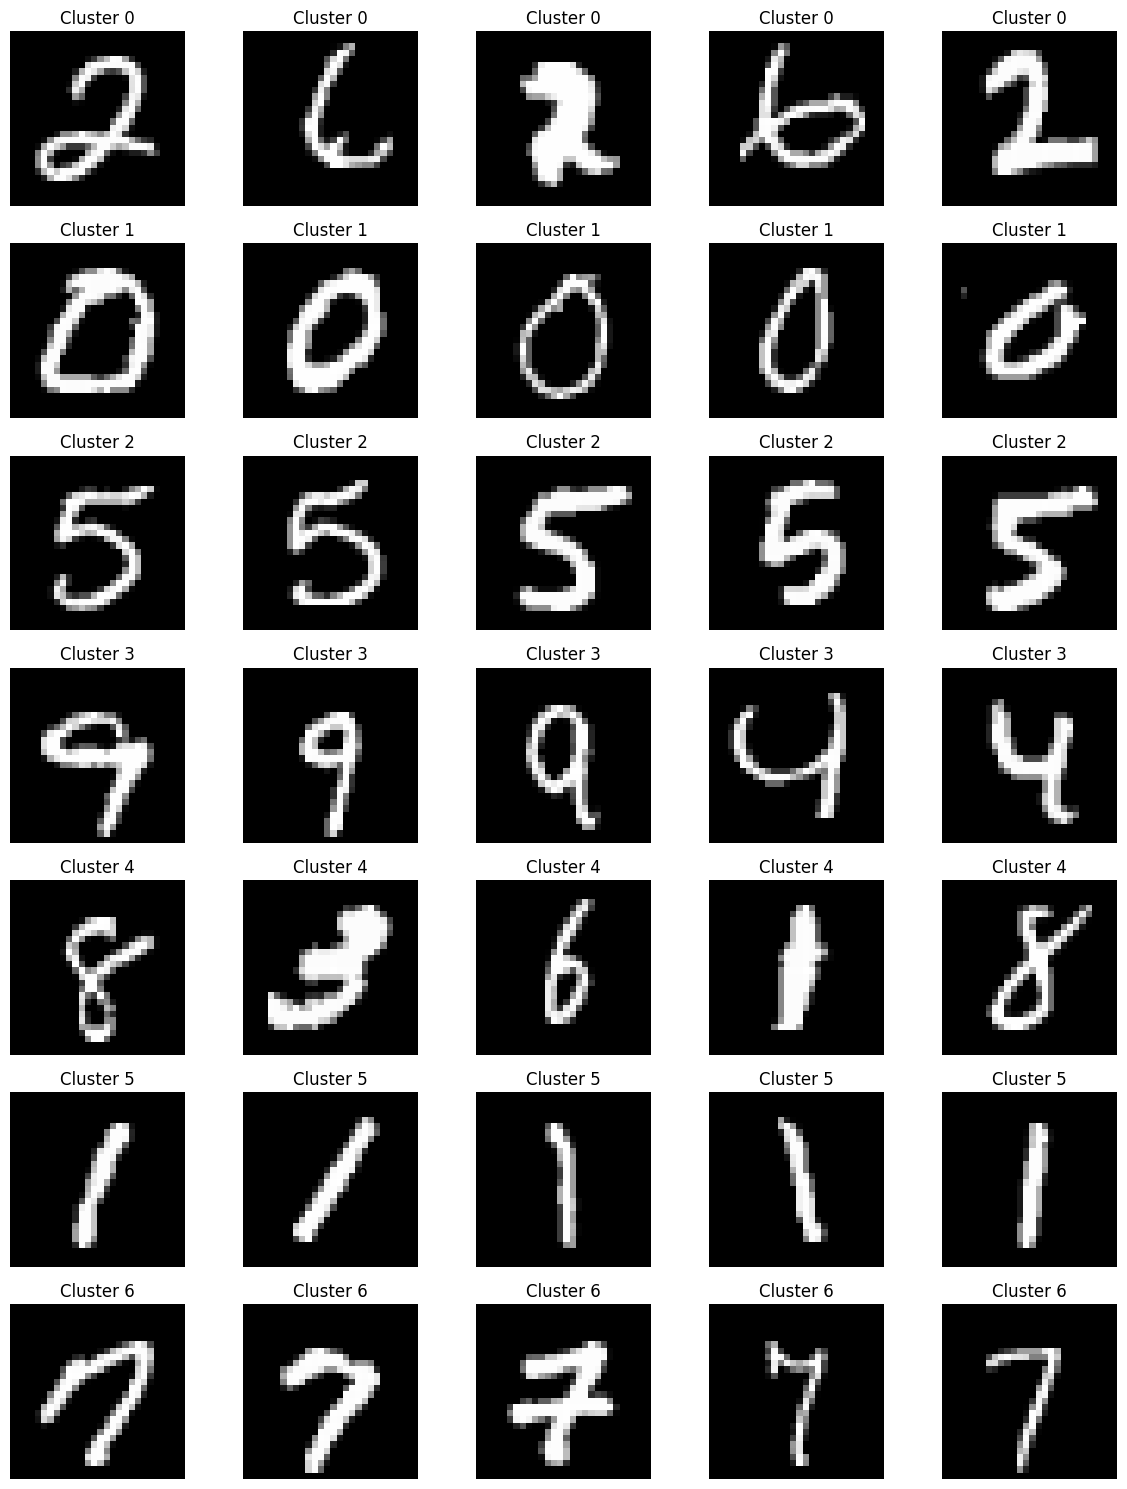

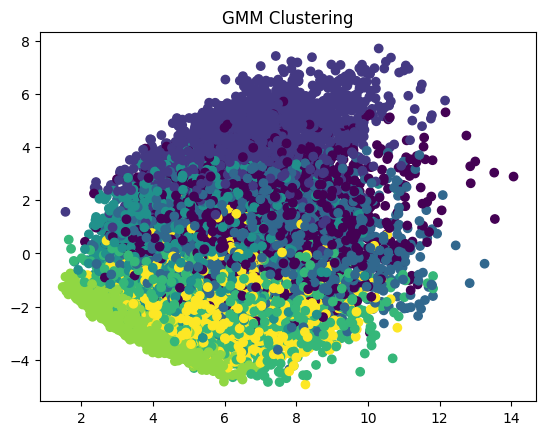

No of Principle Components: 32
No of Clusters: 10


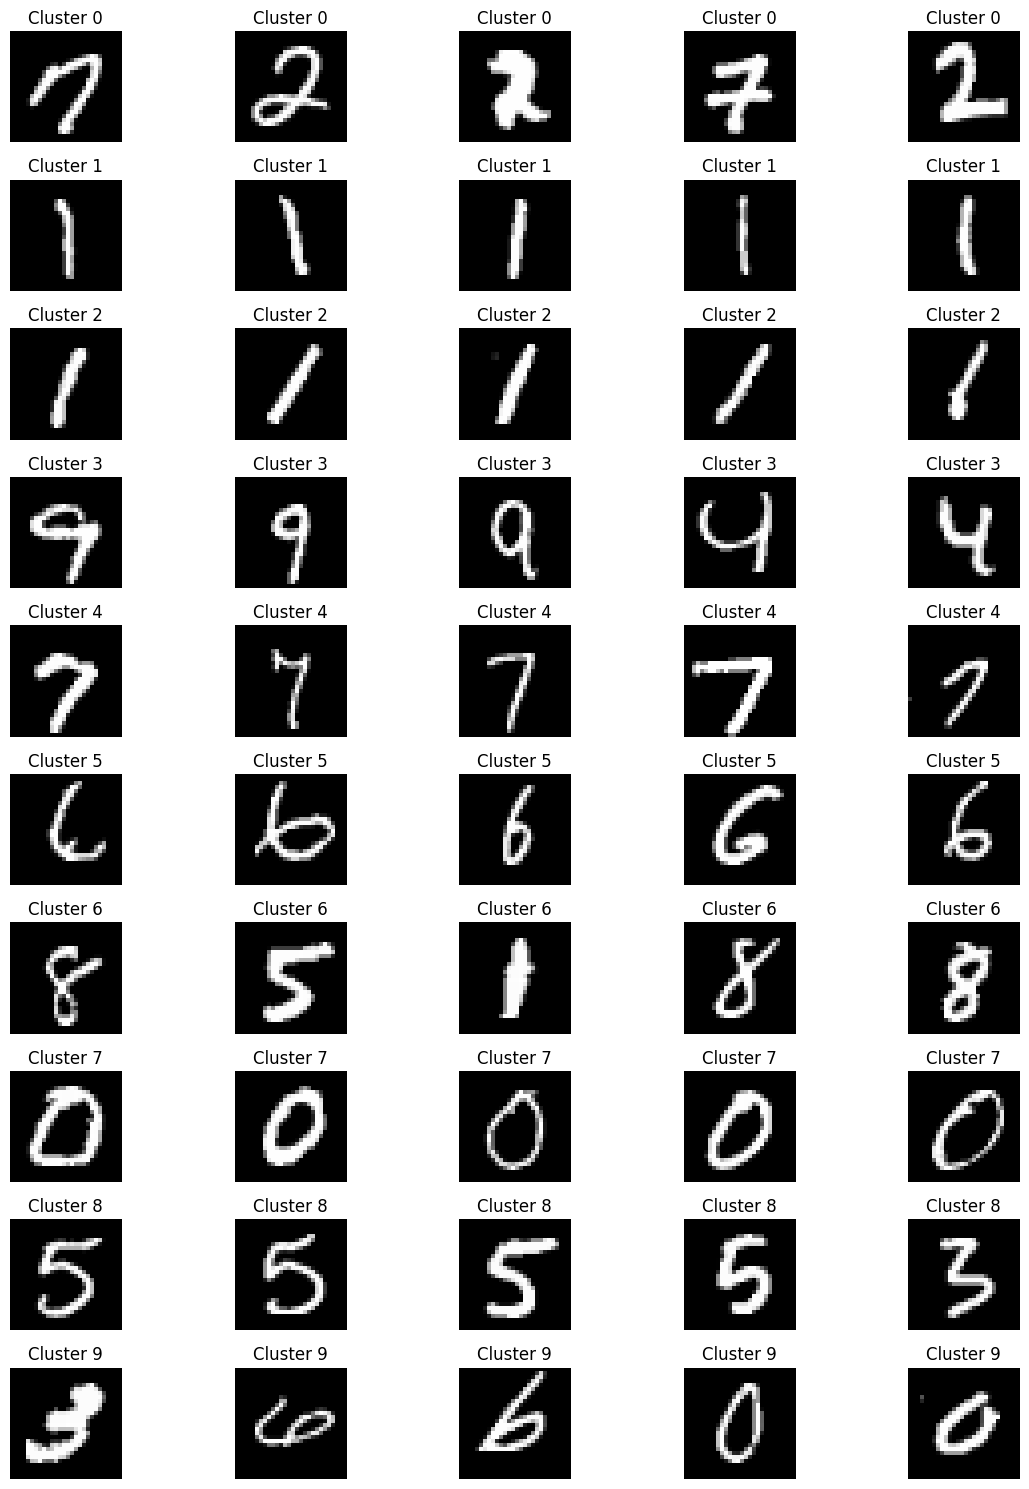

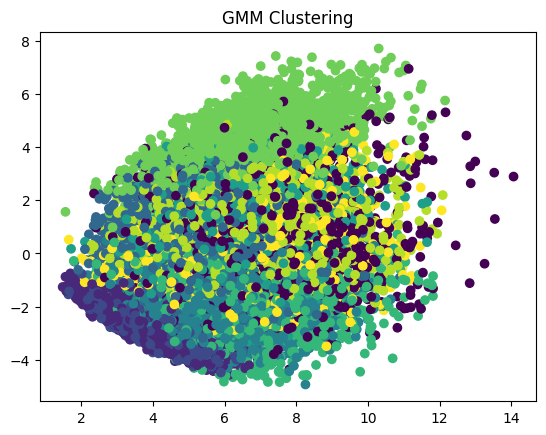

No of Principle Components: 64
No of Clusters: 4


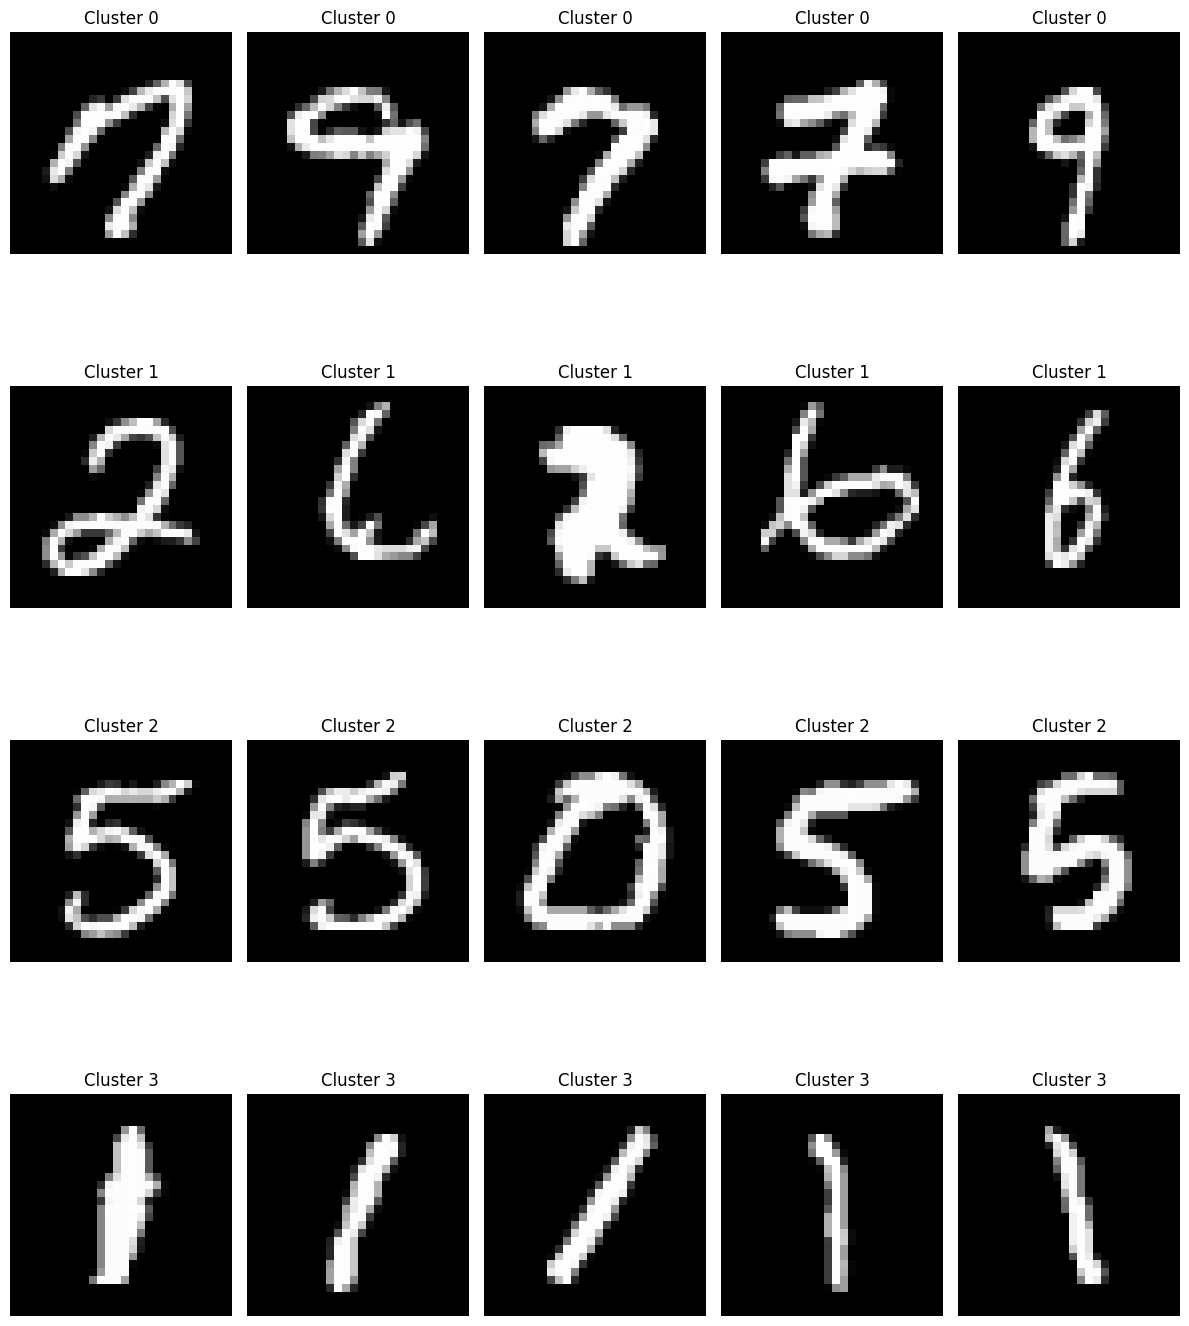

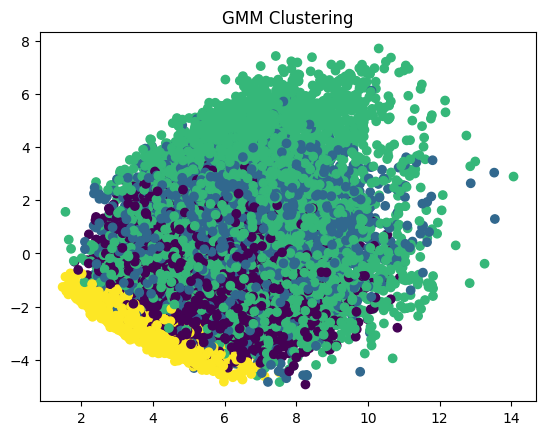

No of Principle Components: 64
No of Clusters: 7


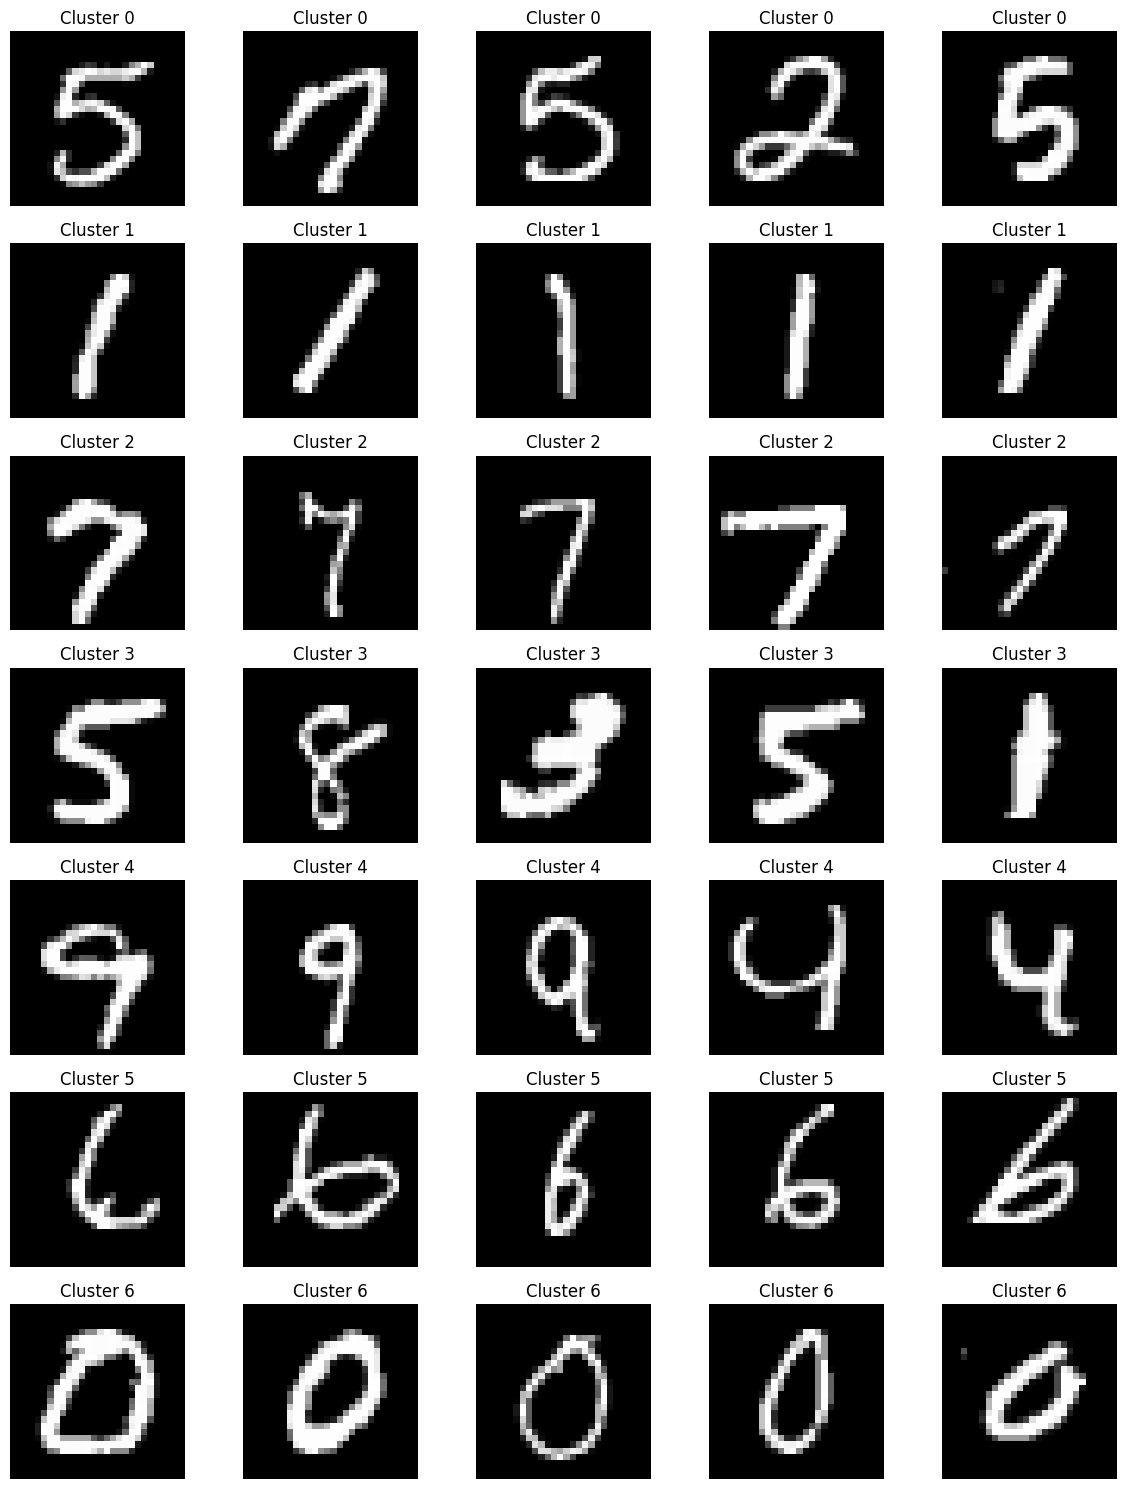

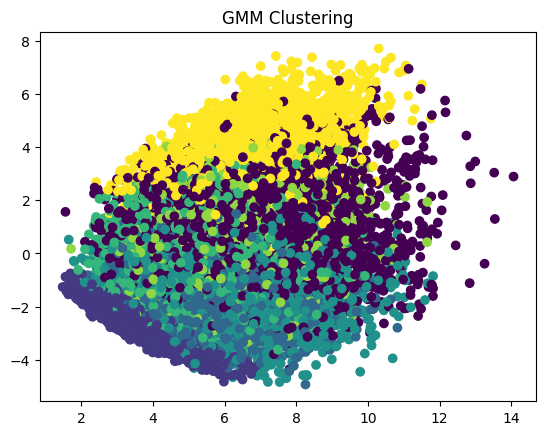

No of Principle Components: 64
No of Clusters: 10


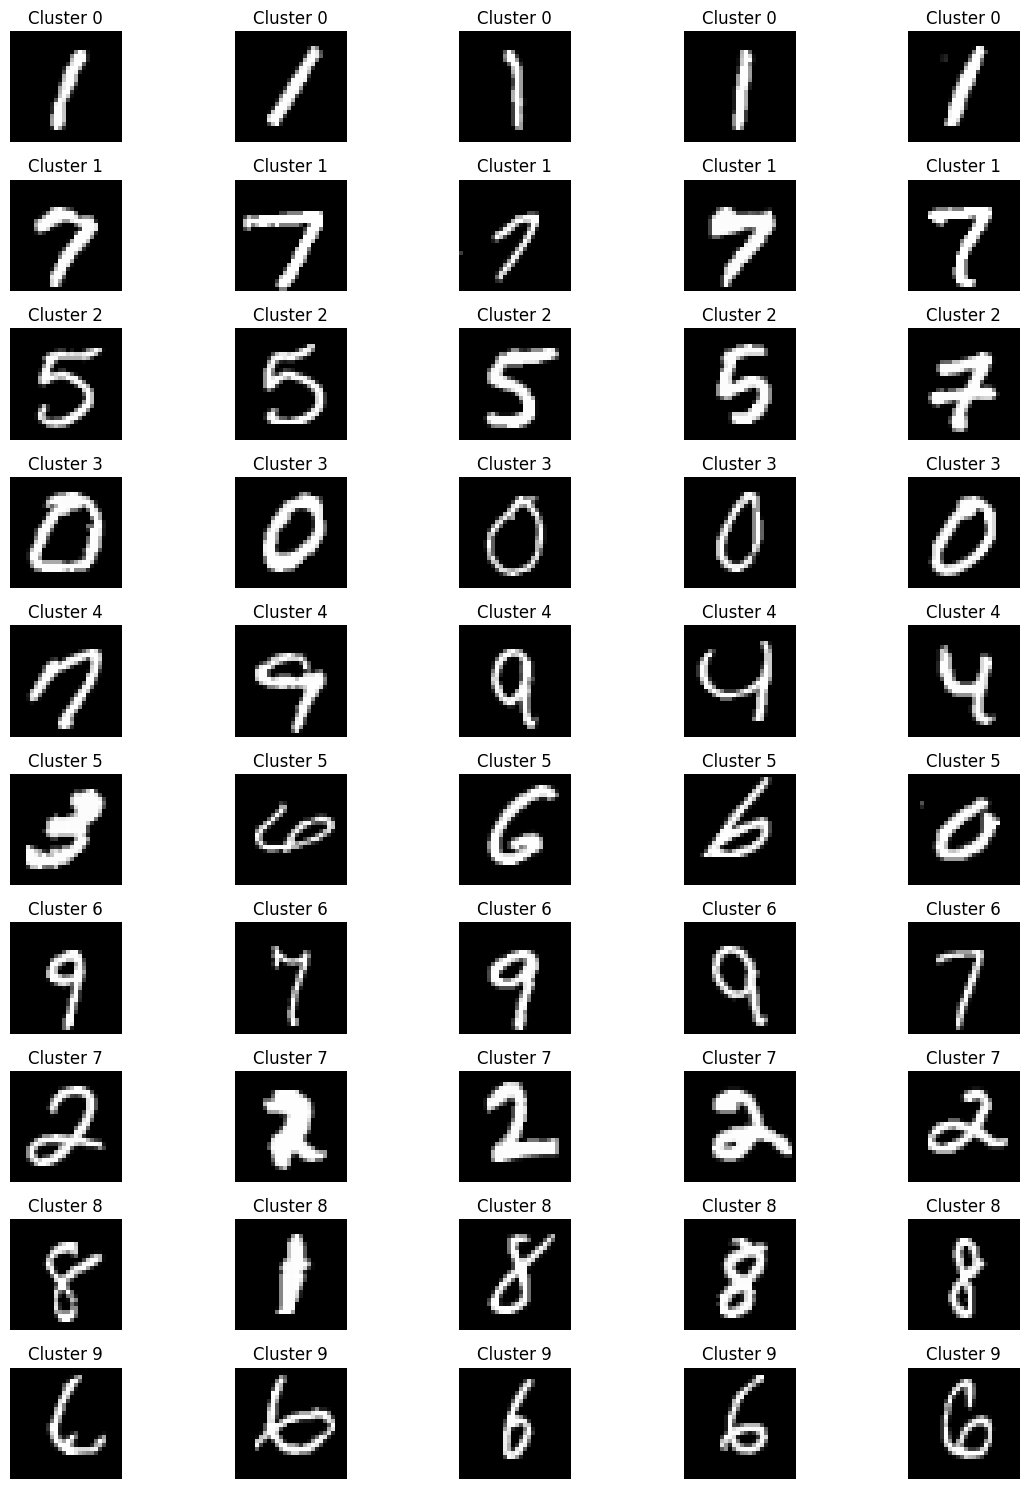

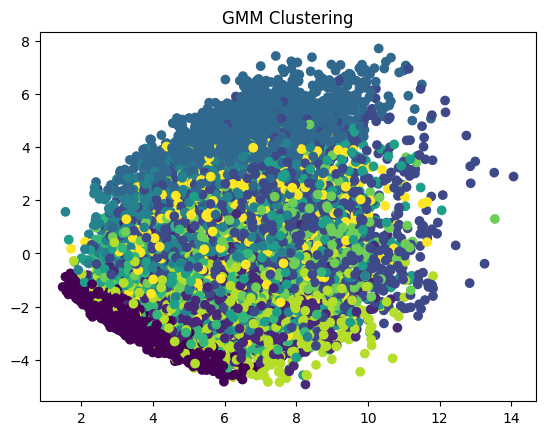

No of Principle Components: 128
No of Clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


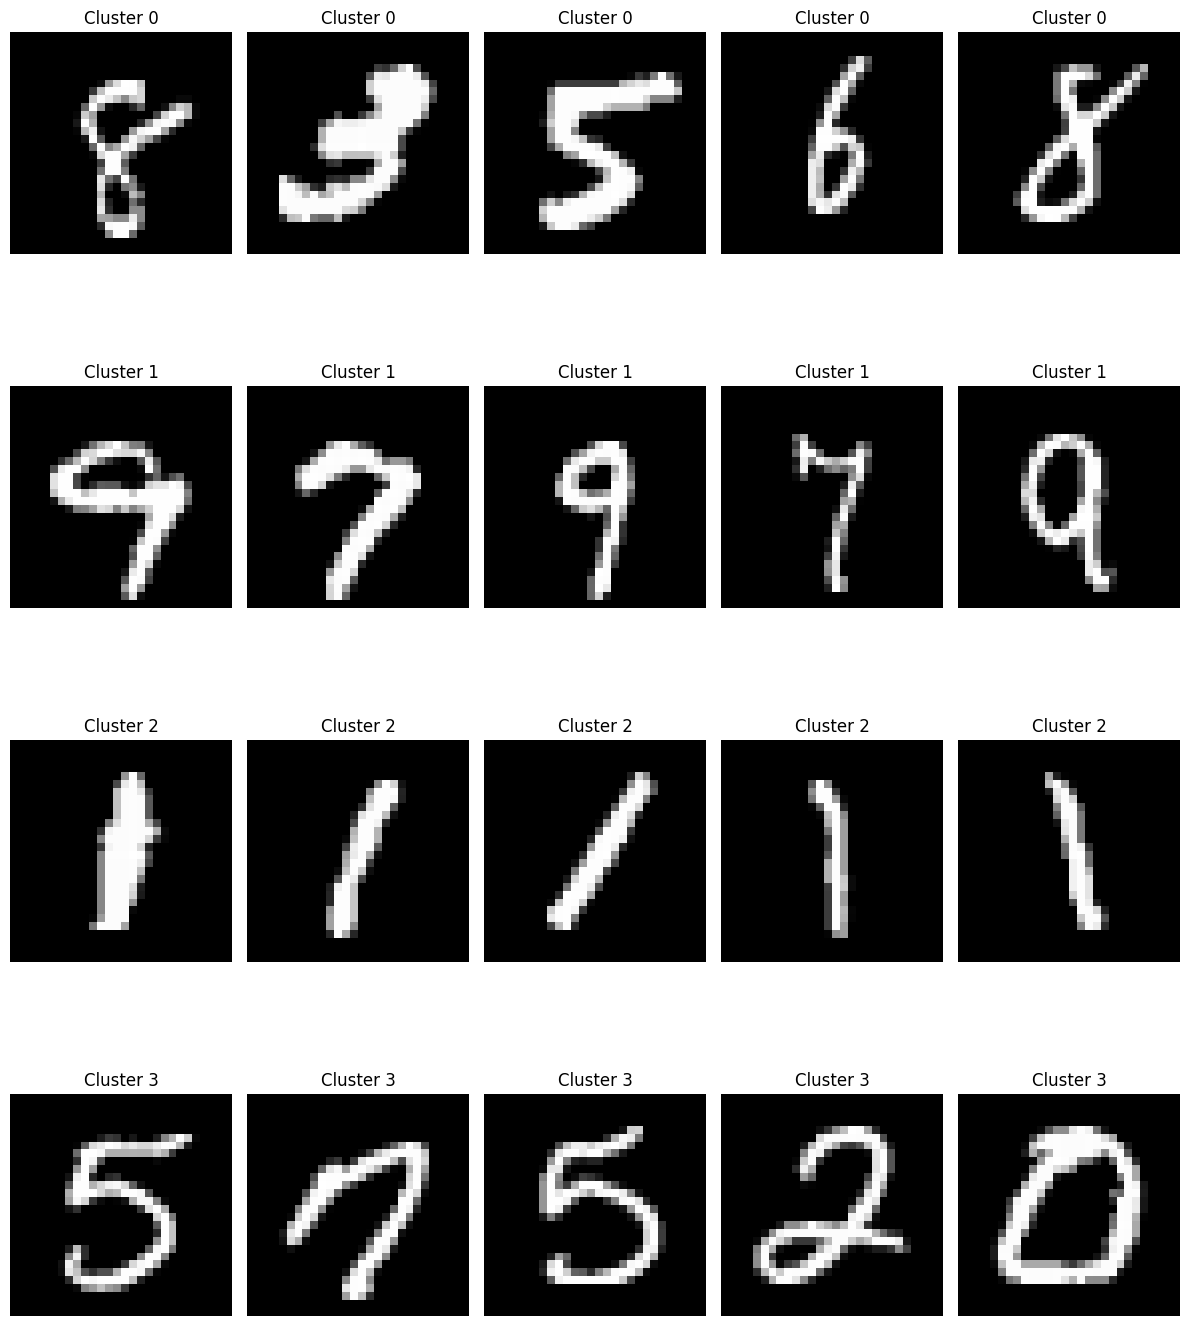

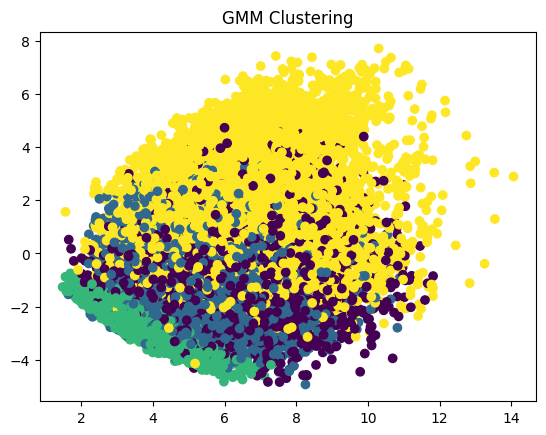

No of Principle Components: 128
No of Clusters: 7


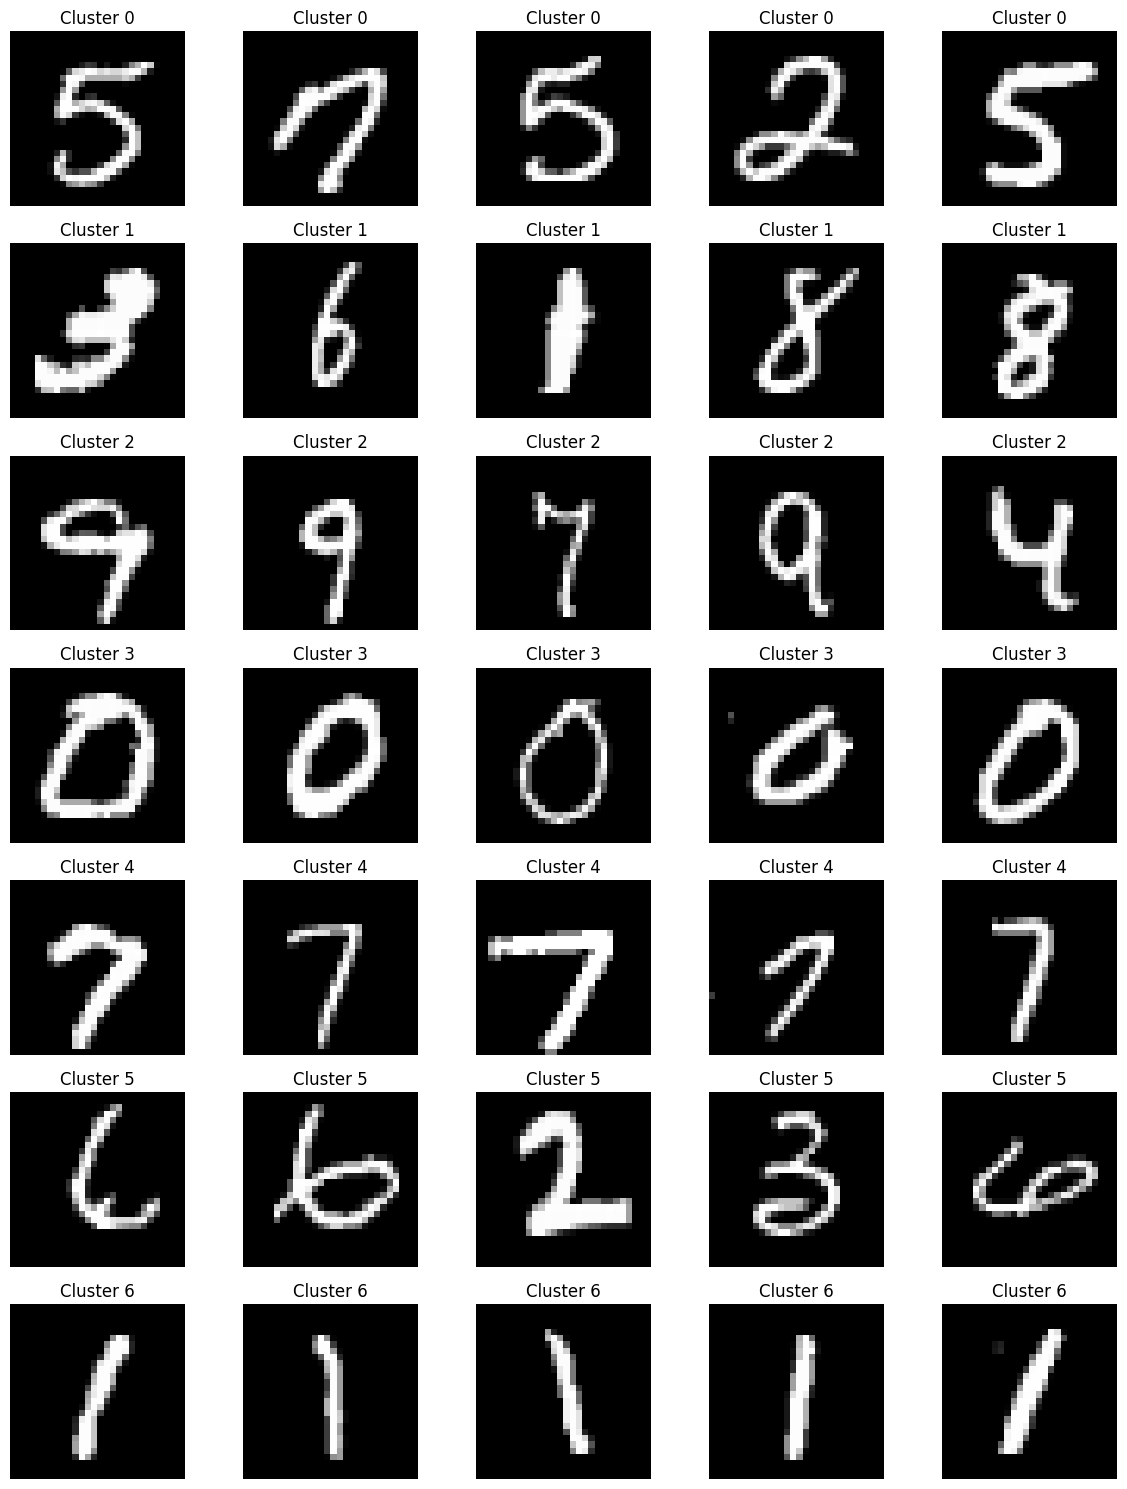

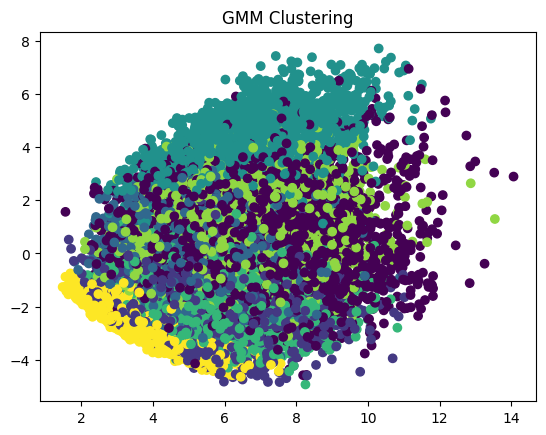

No of Principle Components: 128
No of Clusters: 10


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


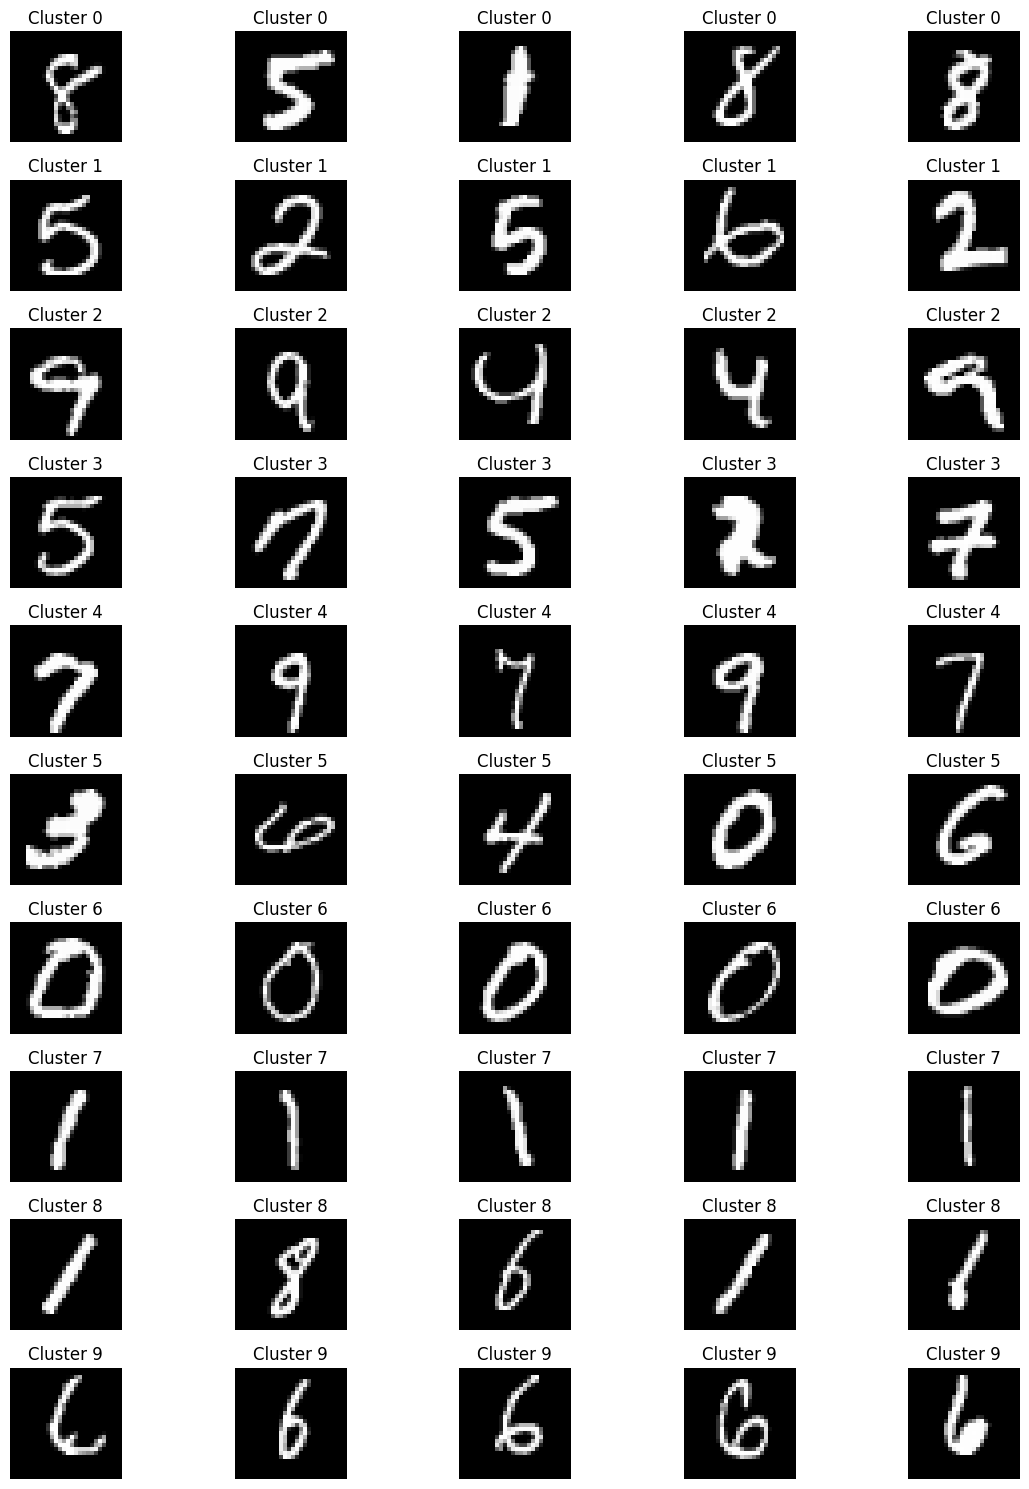

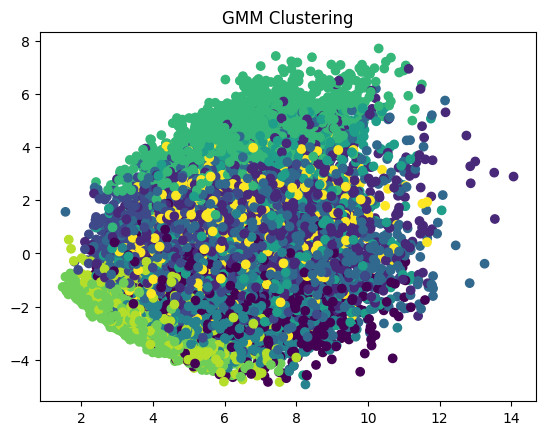

In [2]:

import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as GM
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load MNIST data and normalize."""
    mnist = pd.read_csv(file_path)
    images = mnist.drop(mnist.columns[0], axis=1).to_numpy()

    return images / 255.0

def perform_gmm_clustering(images, num_components, num_clusters):
    """Perform GMM clustering and visualize results."""
    U, S, VT = np.linalg.svd(images, full_matrices=False)
    principle_component = images @ VT.T[:, :num_components]

    print(f"No of Principle Components: {num_components}")
    print(f"No of Clusters: {num_clusters}")

    gmm = GM(n_components=num_clusters)
    gmm.fit(principle_component)
    output = gmm.predict(principle_component)

    # Visualize clusters
    visualize_clusters(images, output, num_clusters)

    # Scatter plot
    plt.scatter(principle_component[:, 0], principle_component[:, 1], c=output, cmap='viridis')
    plt.title('GMM Clustering')
    plt.show()

def visualize_clusters(images, output, num_clusters):
    """Visualize clustered images."""
    plt.figure(figsize=(12, 15))
    for label in range(num_clusters):
        cluster_images = images[output == label]
        for k in range(5):
            plt.subplot(num_clusters, 5, label * 5 + k + 1)
            plt.imshow(cluster_images[k].reshape(28, 28), cmap=plt.cm.gray)
            plt.title(f"Cluster {label}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    file_path = "/content/sample_data/mnist_train_small.csv"
    images = load_data(file_path)

    num_components_list = [32, 64, 128]
    num_clusters_list = [4, 7, 10]

    for num_components in num_components_list:
        for num_clusters in num_clusters_list:
            perform_gmm_clustering(images, num_components, num_clusters)

if __name__ == "__main__":
    main()





```markdown
# GMM Clustering on MNIST Data

## Overview
The code performs Gaussian Mixture Model (GMM) clustering on MNIST data to cluster handwritten digits. It uses the scikit-learn library for GMM implementation and matplotlib for visualization.

## Code Structure
1. **Import Libraries:**
   - `pandas`: For reading and manipulating data.
   - `numpy`: For numerical operations.
   - `GaussianMixture` from `sklearn.mixture`: For GMM clustering.
   - `matplotlib.pyplot`: For data visualization.

2. **Load Data Function:**
   ```python
   def load_data(file_path):
       """Load MNIST data and normalize."""
       # Read MNIST data from a CSV file
       mnist = pd.read_csv(file_path)
       
       # Extract images and normalize them by dividing by 255
       images = mnist.drop(mnist.columns[0], axis=1).to_numpy()
       return images / 255.0
   ```
   - **Input:** File path to the MNIST data in CSV format.
   - **Output:** Normalized images.

3. **GMM Clustering Function:**
   ```python
   def perform_gmm_clustering(images, num_components, num_clusters):
       """Perform GMM clustering and visualize results."""
       # Singular Value Decomposition (SVD) to reduce dimensionality
       U, S, VT = np.linalg.svd(images, full_matrices=False)
       principle_component = images @ VT.T[:, :num_components]
       
       # Print information about the number of components and clusters
       print(f"No of Principle Components: {num_components}")
       print(f"No of Clusters: {num_clusters}")
       
       # Initialize GMM with the specified number of clusters
       gmm = GM(n_components=num_clusters)
       gmm.fit(principle_component)
       output = gmm.predict(principle_component)
       
       # Visualize clusters
       visualize_clusters(images, output, num_clusters)
       
       # Scatter plot of principle components
       plt.scatter(principle_component[:, 0], principle_component[:, 1], c=output, cmap='viridis')
       plt.title('GMM Clustering')
       plt.show()
   ```
   - **Input:**
     - `images`: Normalized MNIST images.
     - `num_components`: Number of principal components after SVD.
     - `num_clusters`: Number of clusters for GMM.
   - **Output:** Visualization of clustered data.

4. **Visualize Clusters Function:**
   ```python
   def visualize_clusters(images, output, num_clusters):
       """Visualize clustered images."""
       plt.figure(figsize=(12, 15))
       
       # Loop through each cluster
       for label in range(num_clusters):
           cluster_images = images[output == label]
           for k in range(5):
               plt.subplot(num_clusters, 5, label * 5 + k + 1)
               plt.imshow(cluster_images[k].reshape(28, 28), cmap=plt.cm.gray)
               plt.title(f"Cluster {label}")
               plt.axis('off')
       
       plt.tight_layout()
       plt.show()
   ```
   - **Input:**
     - `images`: Normalized MNIST images.
     - `output`: Cluster labels.
     - `num_clusters`: Number of clusters.
   - **Output:** Visualization of clustered images.

5. **Main Function:**
   ```python
   def main():
       # Path to MNIST data file
       file_path = "/content/sample_data/mnist_train_small.csv"
       
       # Load MNIST data
       images = load_data(file_path)
       
       # Lists of hyperparameters to iterate over
       num_components_list = [32, 64, 128]
       num_clusters_list = [4, 7, 10]
       
       # Perform GMM clustering for different combinations of components and clusters
       for num_components in num_components_list:
           for num_clusters in num_clusters_list:
               perform_gmm_clustering(images, num_components, num_clusters)
   
   if __name__ == "__main__":
       main()
   ```
   - The `main` function sets the path to the MNIST data file, loads the data, and iterates over different combinations of the number of principal components and clusters, calling the `perform_gmm_clustering` function for each combination.

## Example Usage
- The code can be run to visualize the GMM clustering results for different combinations of principal components and clusters on the MNIST dataset.

## Notes
- The code assumes that the MNIST data is in CSV format and the first column contains labels (digits).
- It uses SVD for dimensionality reduction before applying GMM.
- The visualization includes both a scatter plot of the principal components and a display of some sample images from each cluster.
```
